The code follows more or less verbatim the tutorial [here](http://introtopython.org/visualization_earthquakes.html).

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = (15,15)

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [23]:
from __future__ import unicode_literals

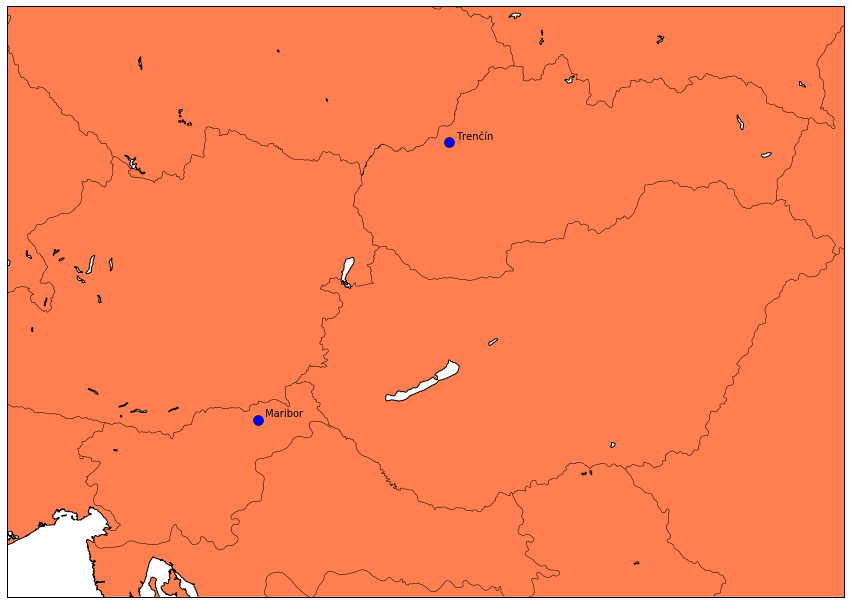

In [25]:
myMap = Basemap(projection='merc',lat_0=50,lon_0=20,resolution='h',area_thresh=1.,
                llcrnrlon=12.5,llcrnrlat=45.,urcrnrlon=23.,urcrnrlat=50.)
myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='coral')
myMap.drawmapboundary()

myMap.drawmeridians(np.arange(0.,360.,30.))
myMap.drawparallels(np.arange(-90,90,30))

lons = [18.04,15.65]
lats = [48.89,46.55]

x,y = myMap(lons,lats)

myMap.plot(x,y,'bo',markersize=10)

labels = ['Trenčín','Maribor']

for label,xpt,ypt in zip(labels,x,y):
    plt.text(xpt+10000,ypt+5000,label)

plt.show()